In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget
import os
import scipy
import statsmodels.api as sm
import numpy as np
import imageio.v2 as imageio
from amftrack.util.plot import gridplot

In [2]:
path_general = r"/mnt/sun/home-folder/cargill/20221027_plate452"

kymos = [path for path in os.listdir(path_general) if path.split("_")[-1] == "kymos"]

In [3]:
data_speed = pd.DataFrame()
for path in kymos:
    path_data = os.path.join(path_general, path, "speed_data.csv")
    if os.path.exists(path_data):
        data = pd.read_csv(path_data)
        data["path"] = path
        data_speed = pd.concat((data_speed, data))

In [4]:
data_speed["unique_id"] = (
    data_speed["edge"] + data_speed["direction"] + data_speed["path"]
)

In [5]:
speeds = data_speed.groupby(["edge", "direction", "path"])["speed (um.s-1)"].mean()
speeds_std = data_speed.groupby(["edge", "direction", "path"])["speed (um.s-1)"].std()

In [6]:
def make_stat(x0, ax):
    def statistic(x, y):
        X = sm.add_constant(x, prepend=False)
        model = sm.OLS(y, X)
        res = model.fit()
        a, b = res.params[0], res.params[1]
        ax.plot(x0, np.array(x0) * a + b, color="grey", alpha=0.01)
        return a

    return statistic

In [11]:
!pip install scipy

Text(0, 0.5, 'speed to the tip $(\\mu m.s^{-1})$')

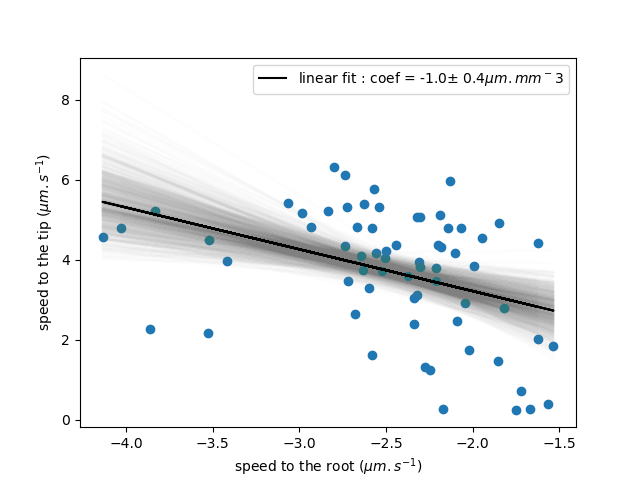

In [18]:
fig, ax = plt.subplots()
xs = []
ys = []
for edge, direction, path in speeds.index:
    if direction == "root":
        x = speeds[(edge, direction, path)]
        y = speeds[(edge, "tip", path)]
        if not np.isnan(x) and not np.isnan(y) and x >= -5 and x <= -1.5:
            xs.append(x)
            ys.append(y)

ax.scatter(xs, ys)
# ax.set_xlim(0,-3)
data = np.array((xs, ys))
n_resamples = 1000
statistic = make_stat(xs, ax)
std = scipy.stats.bootstrap(
    data,
    statistic,
    vectorized=False,
    method="basic",
    n_resamples=n_resamples,
    paired=True,
).standard_error
X = sm.add_constant(xs, prepend=False)
model = sm.OLS(ys, X)
res = model.fit()
a, b = res.params[0], res.params[1]
ax.plot(
    xs,
    np.array(xs) * a + b,
    label=f"linear fit : coef = {round(a,1)}$\pm$ {round(std,1)}$\mu m.mm^{-3}$",
    color="black",
)
plt.legend()
ax.set_xlabel("speed to the root $(\mu m.s^{-1})$")
ax.set_ylabel("speed to the tip $(\mu m.s^{-1})$")

(-7.0, 7.0)

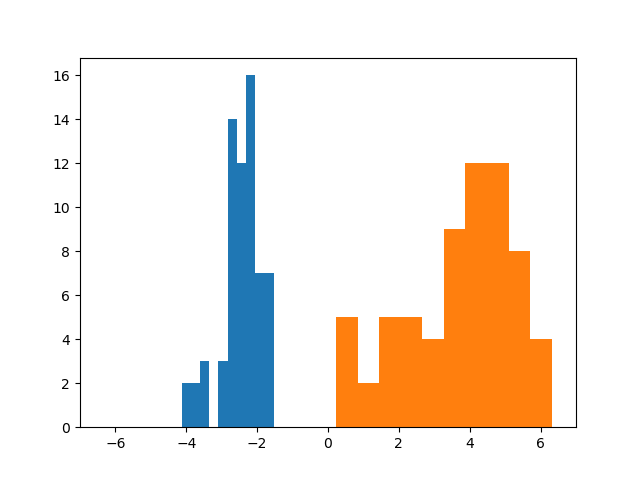

In [19]:
fig, ax = plt.subplots()
ax.hist(xs, 10)
ax.hist(ys, 10)
ax.set_xlim((-7, 7))

(array([3., 0., 0., 3., 6., 2., 5., 6., 7., 6., 4., 6., 4., 2., 2., 0., 5.,
        1., 0., 4.]),
 array([-2.79621337, -2.66242014, -2.52862691, -2.39483368, -2.26104045,
        -2.12724722, -1.99345399, -1.85966076, -1.72586753, -1.5920743 ,
        -1.45828107, -1.32448784, -1.19069461, -1.05690138, -0.92310815,
        -0.78931492, -0.65552169, -0.52172846, -0.38793523, -0.254142  ,
        -0.12034877]),
 <BarContainer object of 20 artists>)

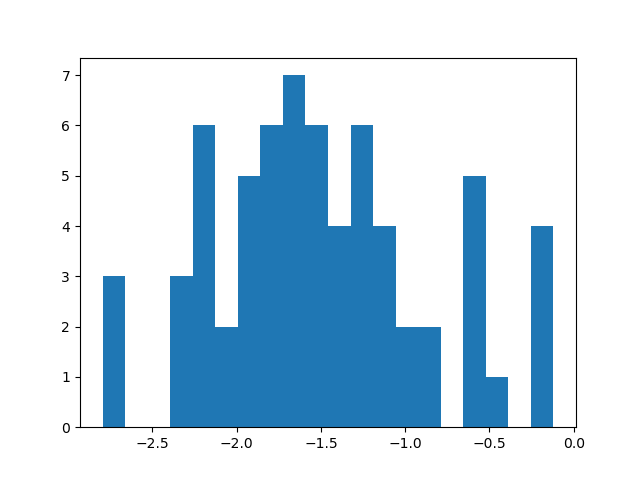

In [20]:
fig, ax = plt.subplots()
ax.hist(np.array(ys) / np.array(xs), 20)
# ax.hist(ys,8)

In [21]:
np.median(np.array(ys) / np.array(xs))

-1.5794918660270896

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'speed to the tip $(\\mu m.s^{-1})$')

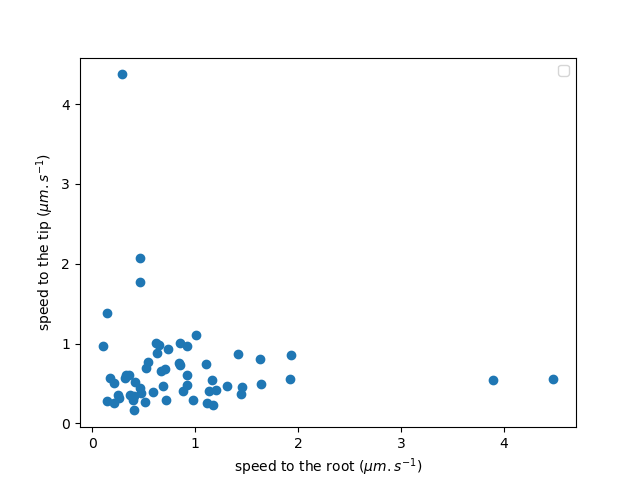

In [20]:
fig, ax = plt.subplots()
xs = []
ys = []
for edge, direction, path in speeds.index:
    if direction == "root":
        x = speeds_std[(edge, direction, path)]
        y = speeds_std[(edge, "tip", path)]
        if not np.isnan(x) and not np.isnan(y) and x >= -3.3:
            xs.append(x)
            ys.append(y)

ax.scatter(xs, ys)
plt.legend()
ax.set_xlabel("speed to the root $(\mu m.s^{-1})$")
ax.set_ylabel("speed to the tip $(\mu m.s^{-1})$")

In [23]:
np.median(xs), np.median(ys)

(0.6760389288965976, 0.5465810832619002)

In [22]:
np.std(xs) / np.sqrt(len(xs)), np.std(ys) / np.sqrt(len(ys))

(0.10159660942793873, 0.07926226838776924)

C:\Users\coren\AppData\Local\Temp\ipykernel_23900\3772325469.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots()


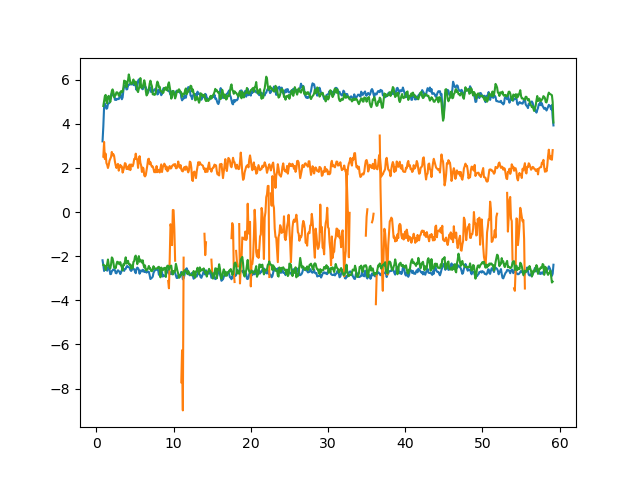

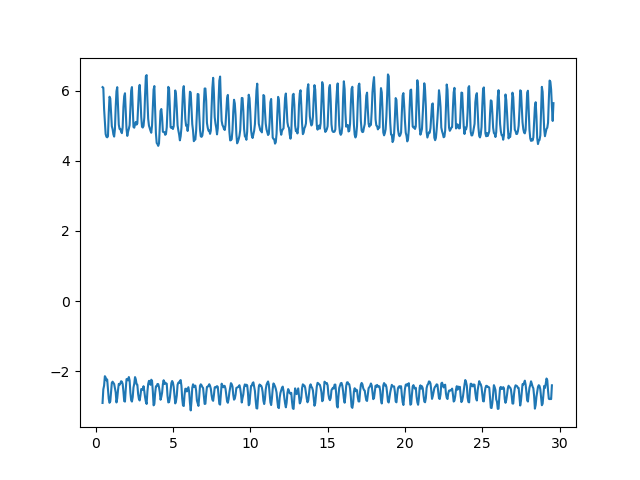

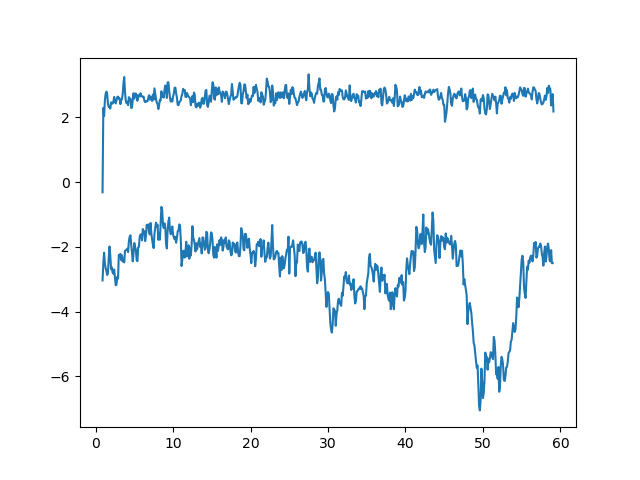

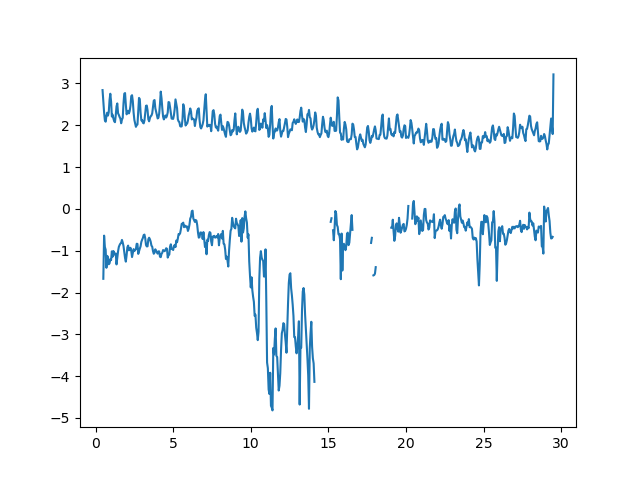

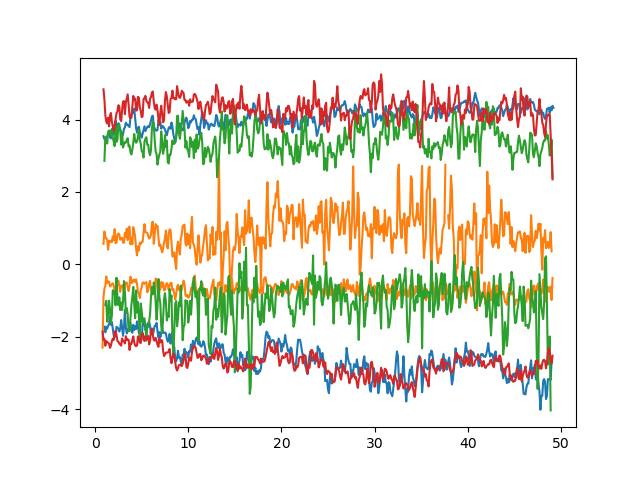

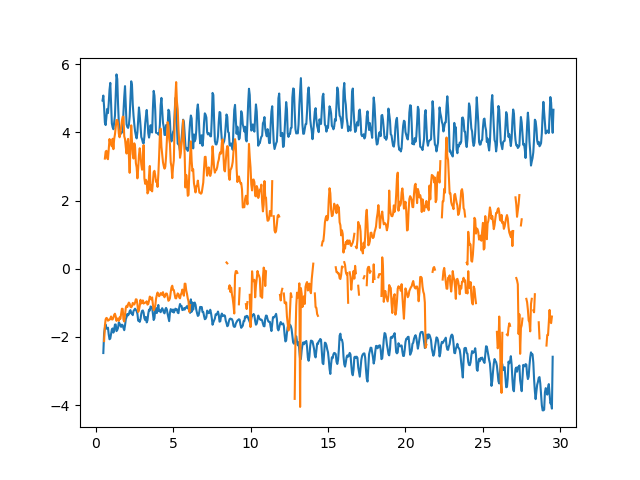

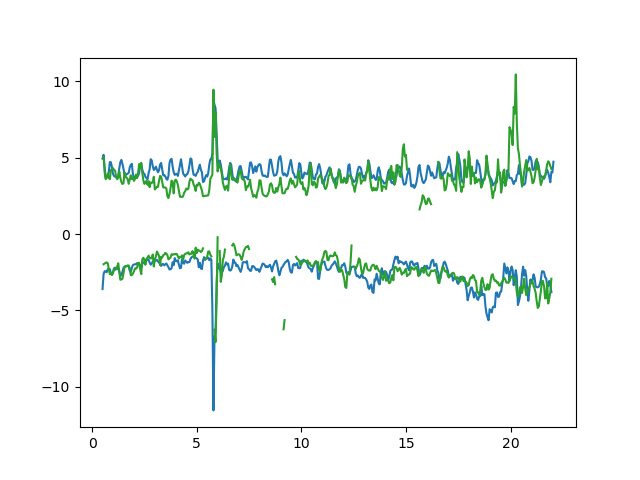

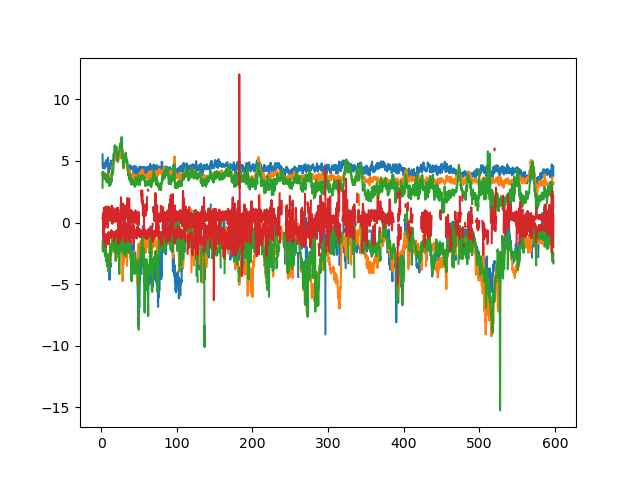

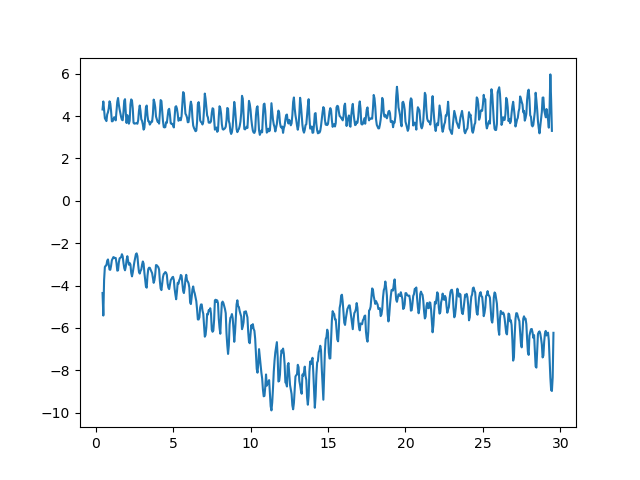

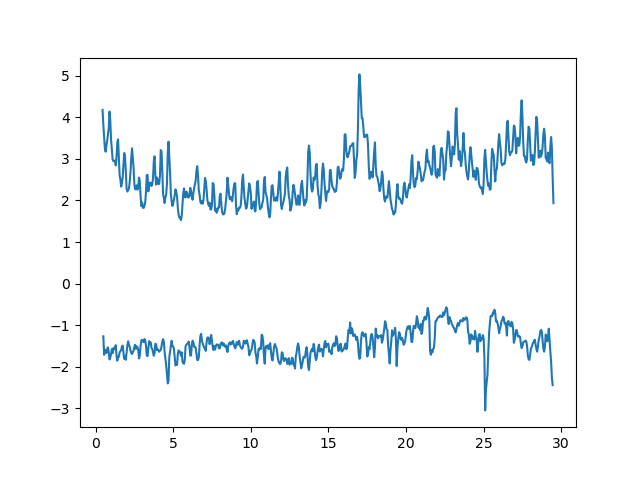

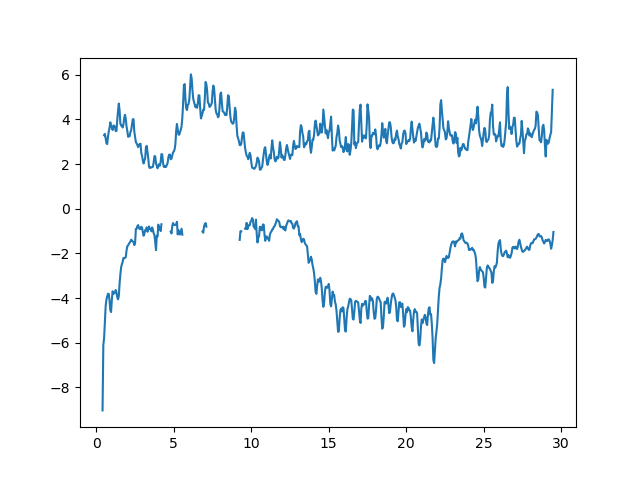

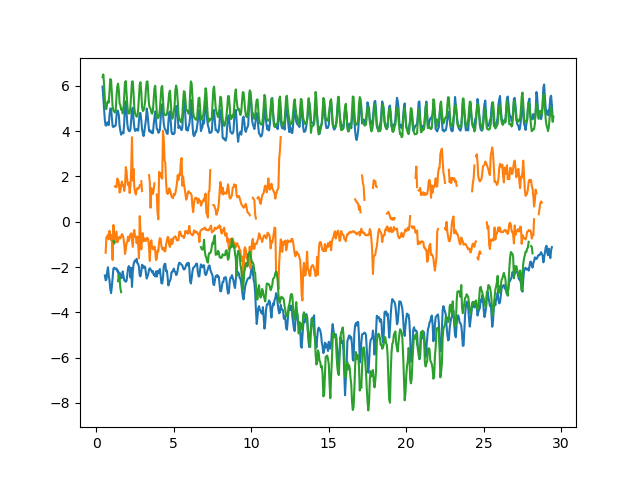

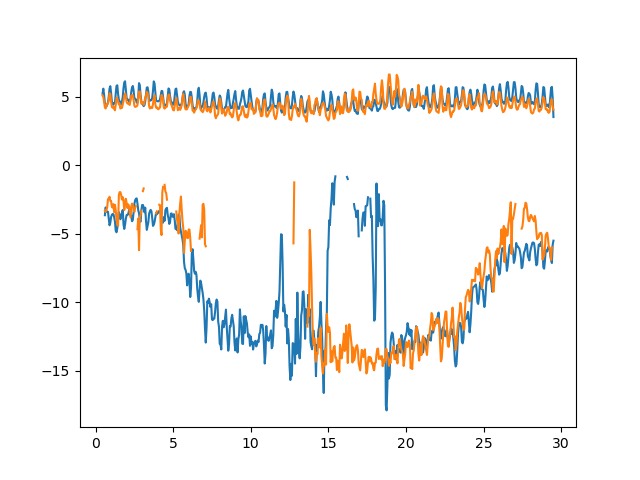

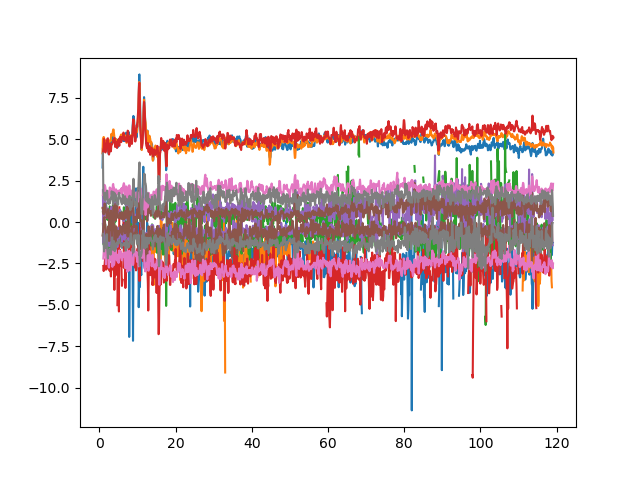

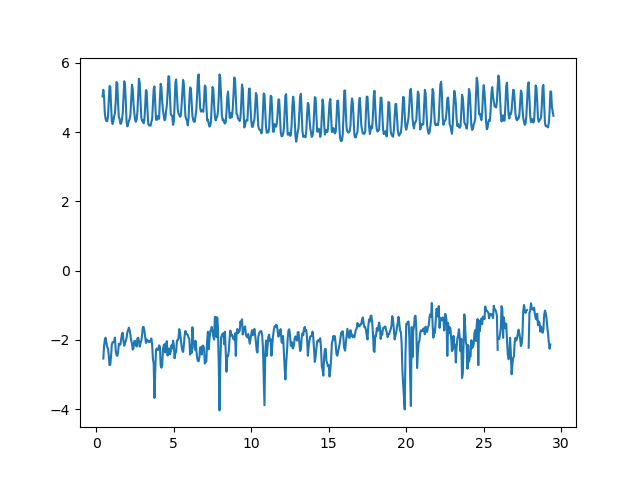

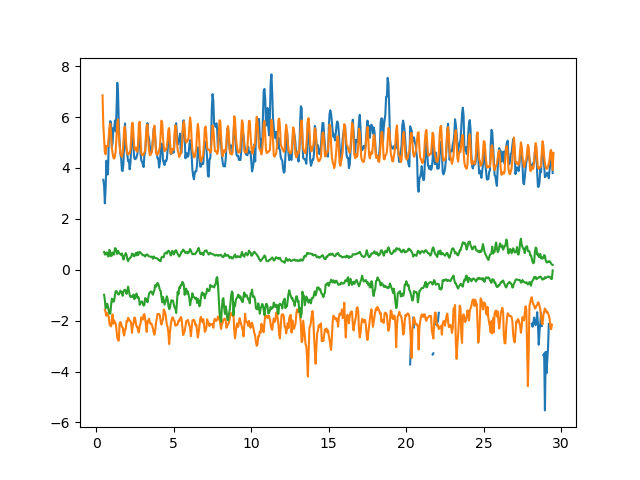

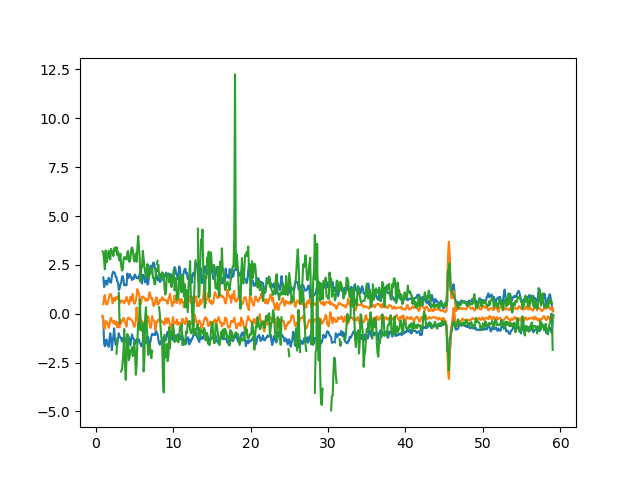

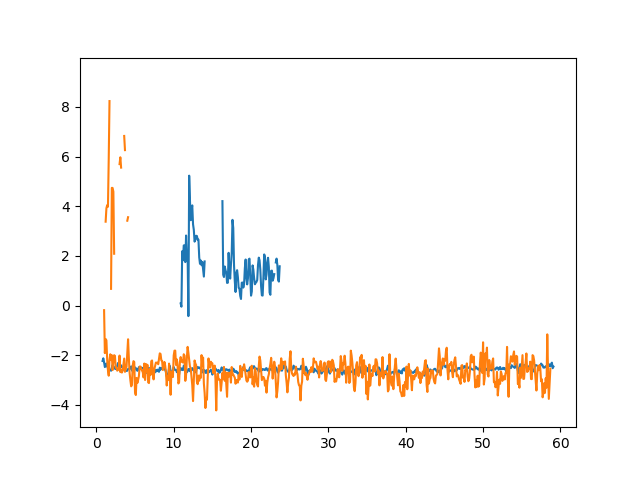

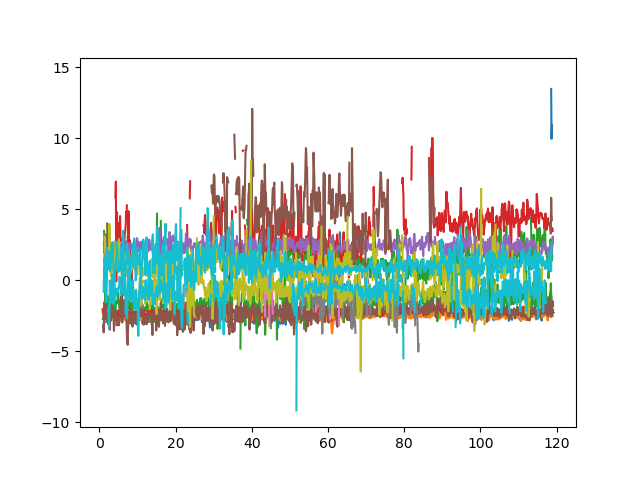

In [9]:
for path in data_speed["path"].unique():
    fig, ax = plt.subplots()
    select = data_speed.loc[data_speed["path"] == path]
    for edge in select["edge"].unique():
        sub_select = select.loc[select["edge"] == edge]
        ax.plot(sub_select["time (s)"], sub_select["speed (um.s-1)"])

(array([10.,  8.,  8.,  2.,  0.,  2.,  0.,  4.,  0.,  2.]),
 array([ 4.48474852,  5.1300018 ,  5.77525509,  6.42050837,  7.06576166,
         7.71101494,  8.35626823,  9.00152151,  9.6467748 , 10.29202808,
        10.93728136]),
 <BarContainer object of 10 artists>)

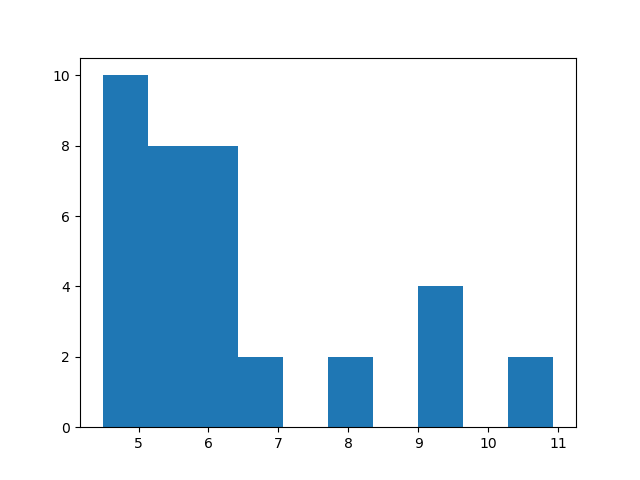

In [35]:
value_4x = []
value_50x = []

In [21]:
num = 48
path = f"20221027_plate452_0{num}_kymos"
select = data_speed.loc[data_speed["path"] == path]
edges = [(16, 10)]
edges = [str(edge) for edge in edges]
sub_select = select.loc[select["edge"].isin(edges)]
sub_select = sub_select.loc[sub_select["direction"] == "root"]

value_4x.append(-np.nanmean(sub_select["speed (um.s-1)"]))

In [8]:
value_4x = np.load("values_4x.npy").tolist()
value_50x = np.load("values_50x.npy").tolist()

In [22]:
num = 50
path = f"20221027_plate452_0{num}_kymos"
select = data_speed.loc[data_speed["path"] == path]
edges = [(1837, 1417)]
edges = [str(edge) for edge in edges]
sub_select = select.loc[select["edge"].isin(edges)]
sub_select = sub_select.loc[sub_select["direction"] == "root"]

value_50x.append(-np.nanmean(sub_select["speed (um.s-1)"]))

In [24]:
np.save("values_50x", value_50x)

In [25]:
np.save("values_4x", value_4x)

Text(0, 0.5, '50x speed (um.s-1)')

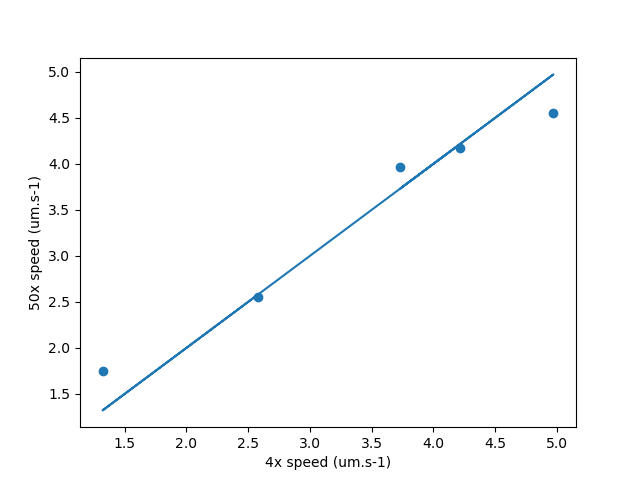

In [9]:
fig, ax = plt.subplots()
ax.scatter(value_4x, value_50x)
ax.plot(value_4x, value_4x)
ax.set_xlabel("4x speed (um.s-1)")
ax.set_ylabel("50x speed (um.s-1)")

In [8]:
nums = [19]
for num in nums:
    path = f"20221027_plate452_0{num}_kymos"
    path_data = os.path.join(path_general, path, "extraction.png")
    im = imageio.imread(path_data)
    select = data_speed.loc[data_speed["path"] == path]
    fig, ax = plt.subplots()
    ax.imshow(im)
    fig, ax = plt.subplots()

    for edge in select["edge"].unique():
        sub_select = select.loc[select["edge"] == edge]
        ax.plot(sub_select["time (s)"], sub_select["speed (um.s-1)"], label=edge)
    plt.legend()

FileNotFoundError: No such file: 'C:\Users\coren\AMOLF-SHIMIZU Dropbox\Corentin Bisot\temp\20221027_plate452_019_kymos\extraction.png'

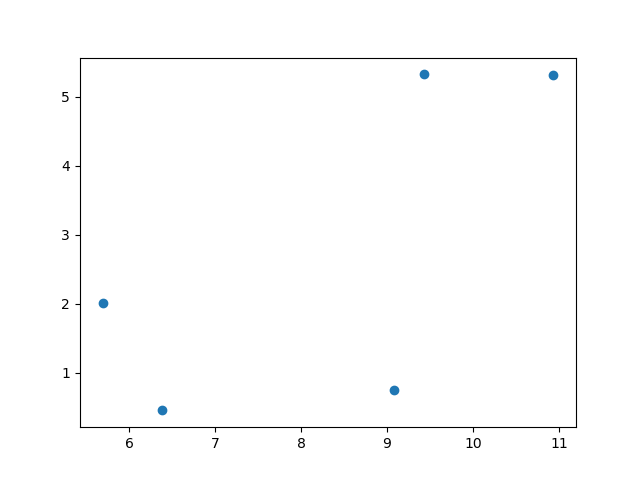

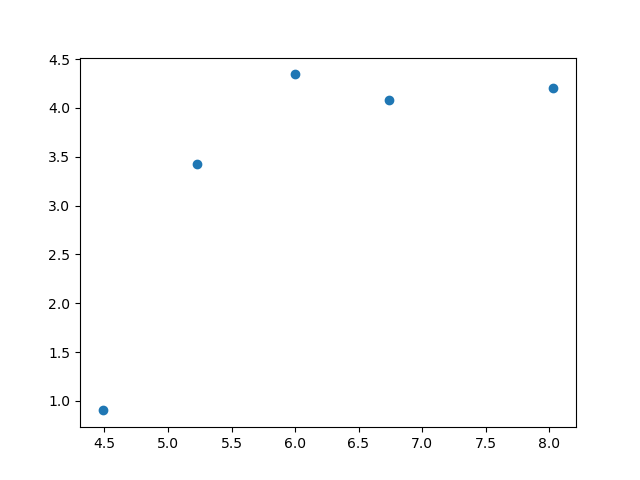

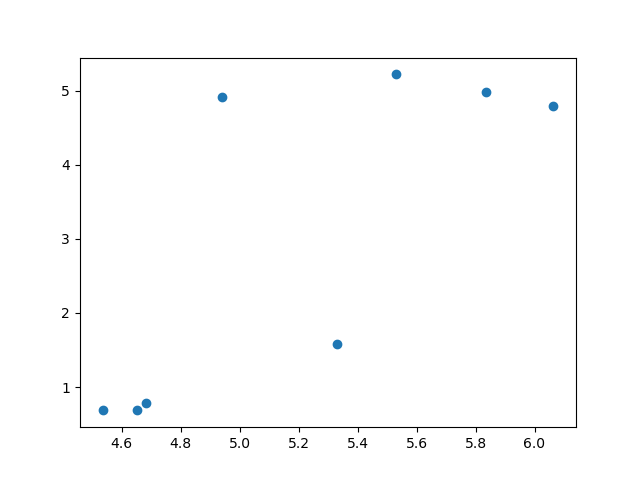

In [40]:
select = data_speed.loc[~data_speed["width"].isna()]
for path in select["path"].unique():
    fig, ax = plt.subplots()
    selection = select.loc[select["path"] == path]
    selection = selection.loc[selection["direction"] == "tip"]
    speed = selection.groupby("unique_id")["speed (um.s-1)"].mean()
    width = selection.groupby("unique_id")["width"].mean()
    ax.scatter(width, speed)

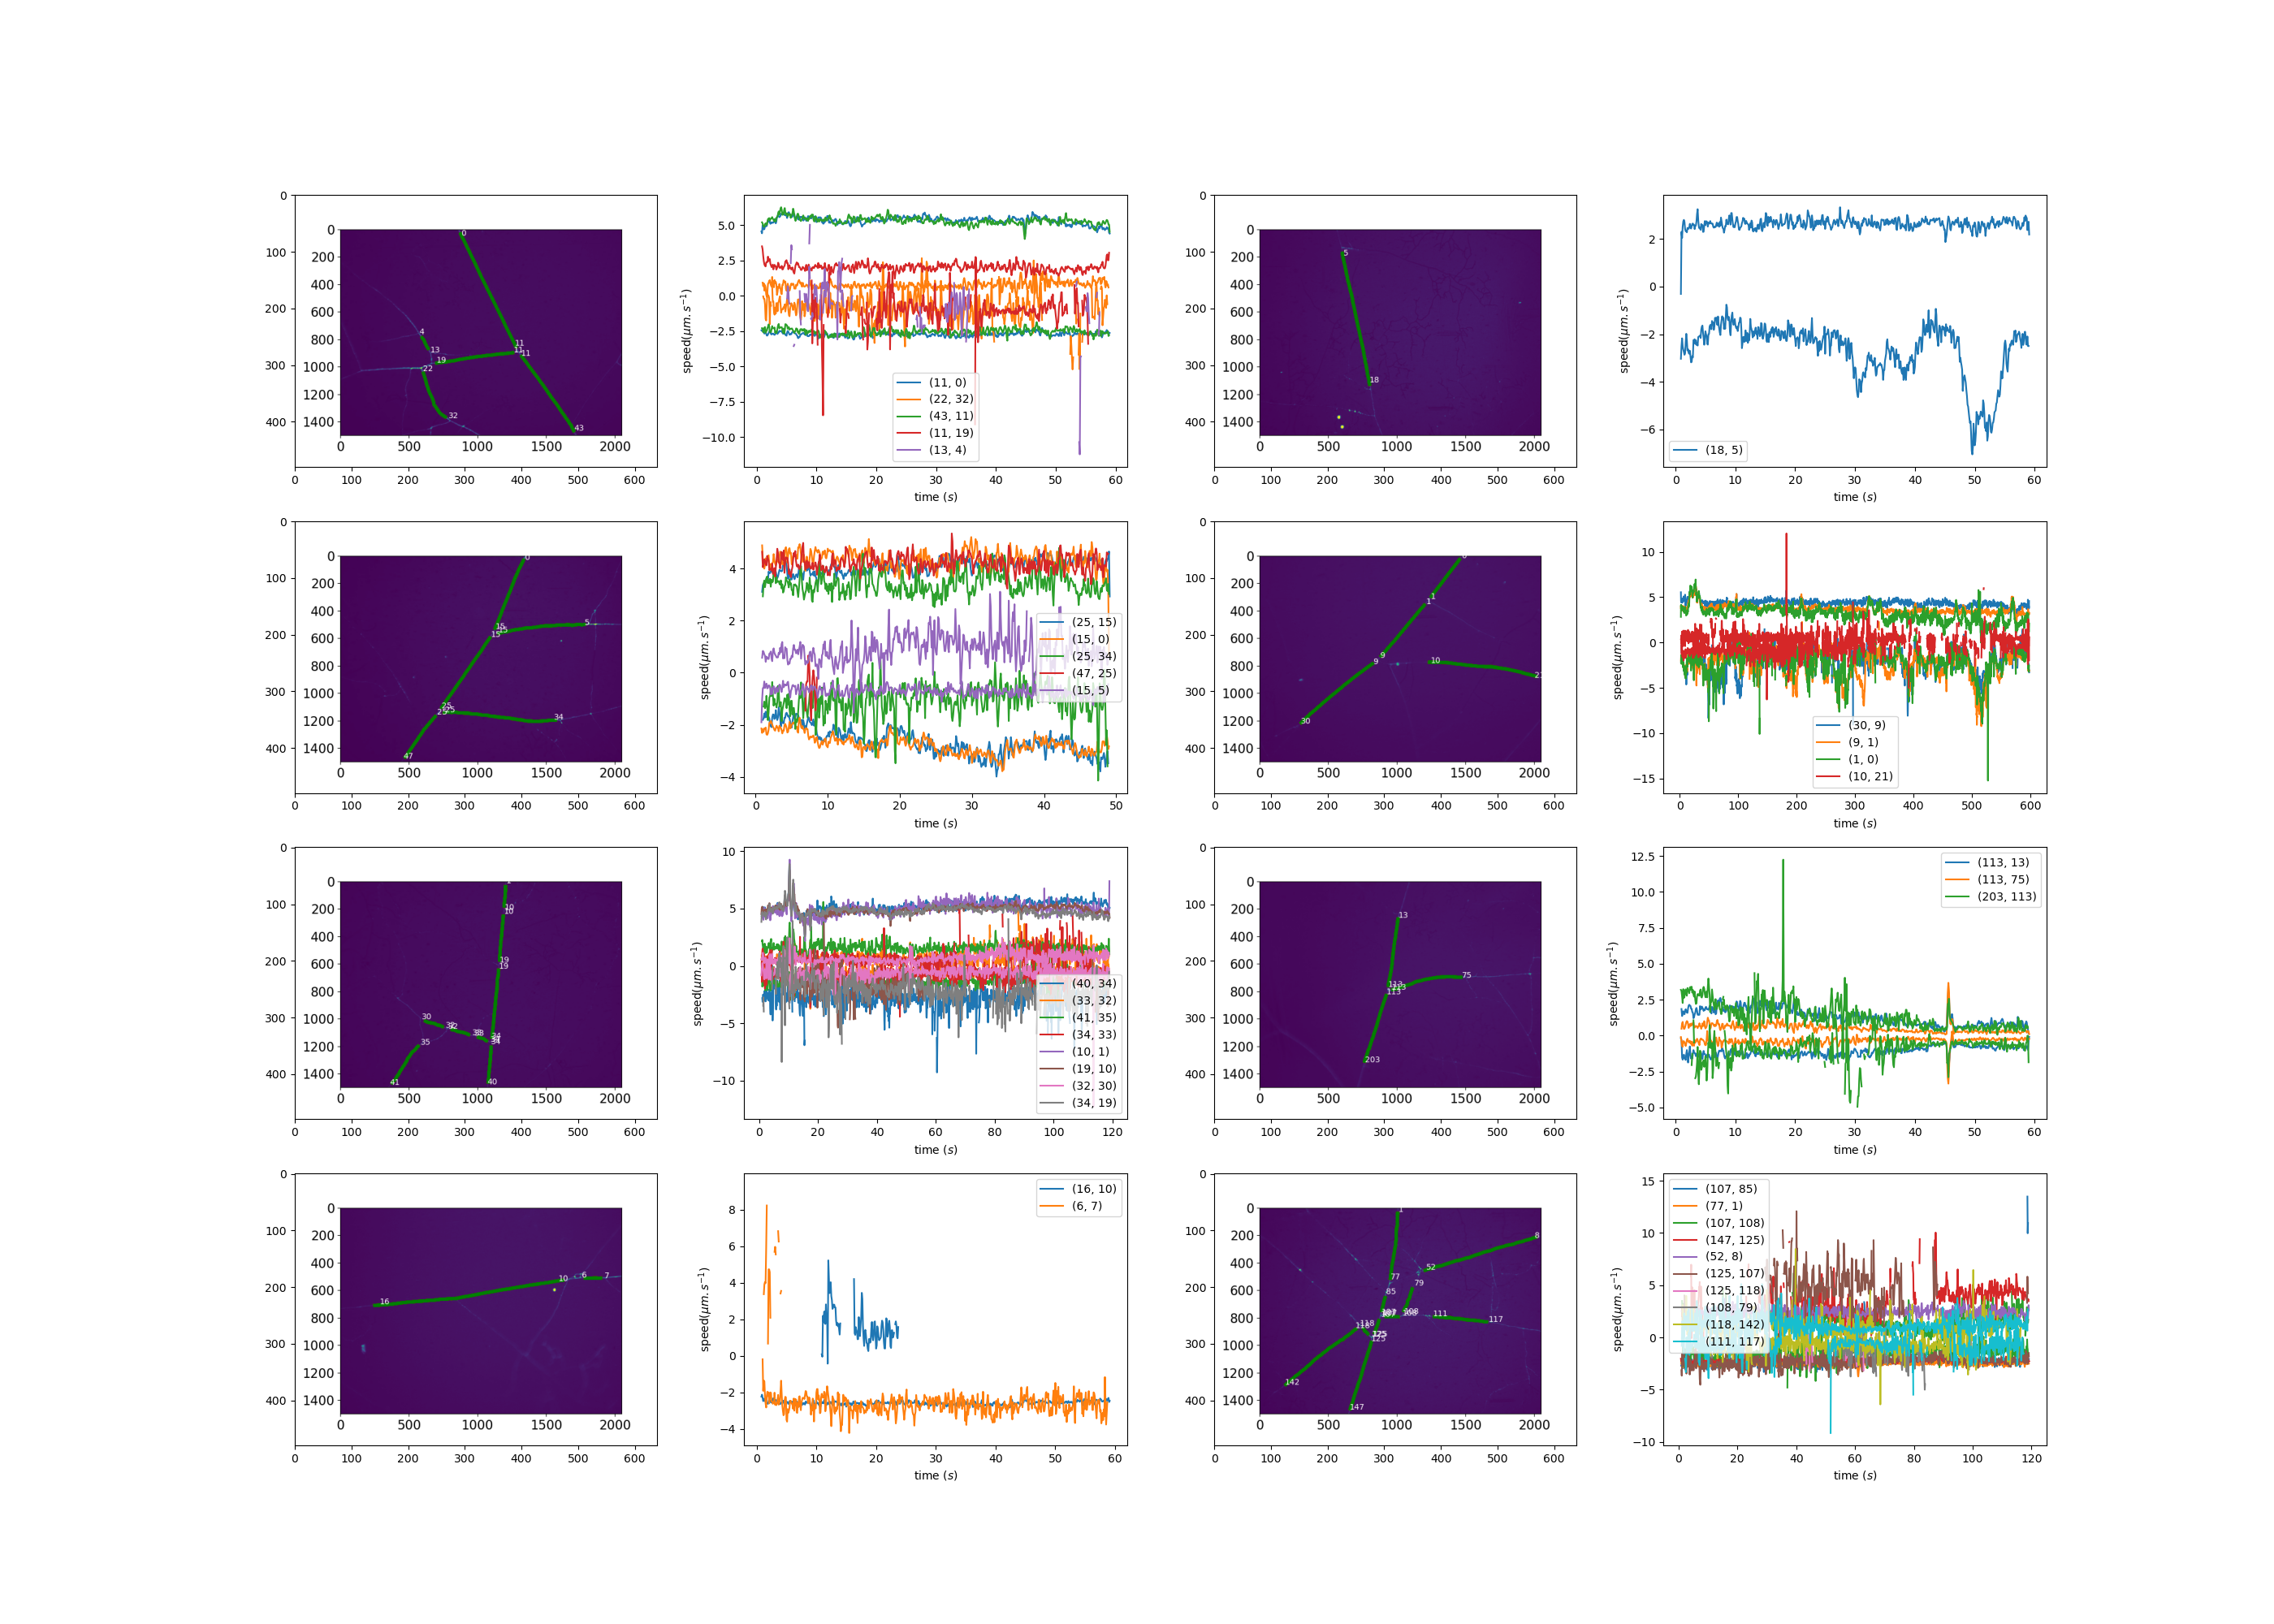

In [9]:
nums = ["01", 11, 16, 27, 37, 43, 48, 54]
fig, axs = gridplot(2 * len(nums), ncols=len(nums) // 2, subh=5, subw=7)
axs = list(axs)
for i, num in enumerate(nums):
    path = f"20221027_plate452_0{num}_kymos"
    path_data = os.path.join(path_general, path, "extraction.png")
    im = imageio.imread(path_data)
    select = data_speed.loc[data_speed["path"] == path]
    ax = axs[2 * i]
    ax.imshow(im)
    ax = axs[2 * i + 1]

    for edge in select["edge"].unique():
        sub_select = select.loc[select["edge"] == edge]
        ax.plot(sub_select["time (s)"], sub_select["speed (um.s-1)"], label=edge)
    ax.set_ylabel("speed($\mu m.s^{-1}$)")
    ax.set_xlabel("time ($s$)")
    ax.legend()

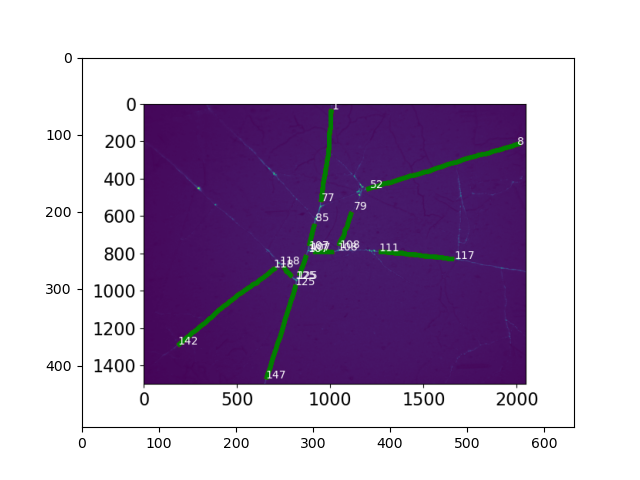

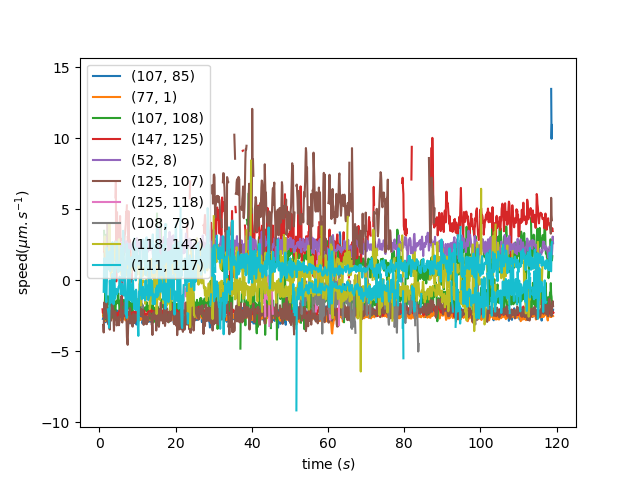

In [10]:
num = 54
fig, ax = plt.subplots()
path = f"20221027_plate452_0{num}_kymos"
path_data = os.path.join(path_general, path, "extraction.png")
im = imageio.imread(path_data)
select = data_speed.loc[data_speed["path"] == path]
ax.imshow(im)
fig, ax = plt.subplots()

for edge in select["edge"].unique():
    sub_select = select.loc[select["edge"] == edge]
    ax.plot(sub_select["time (s)"], sub_select["speed (um.s-1)"], label=edge)
ax.set_ylabel("speed($\mu m.s^{-1}$)")
ax.set_xlabel("time ($s$)")
ax.legend()

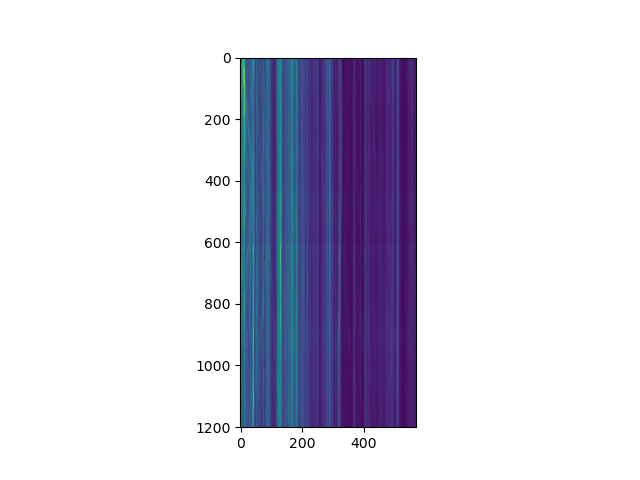

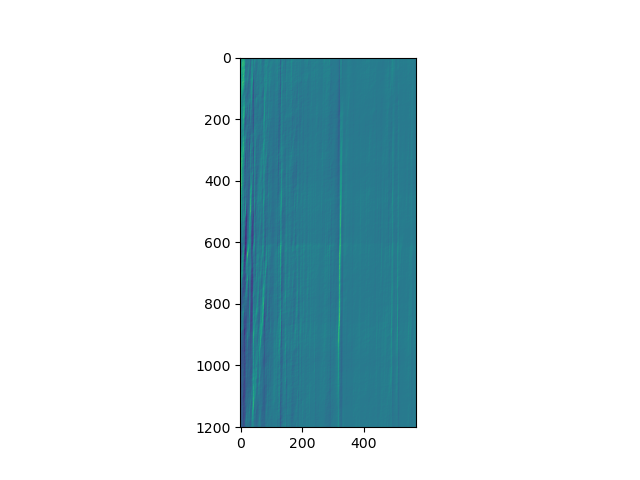

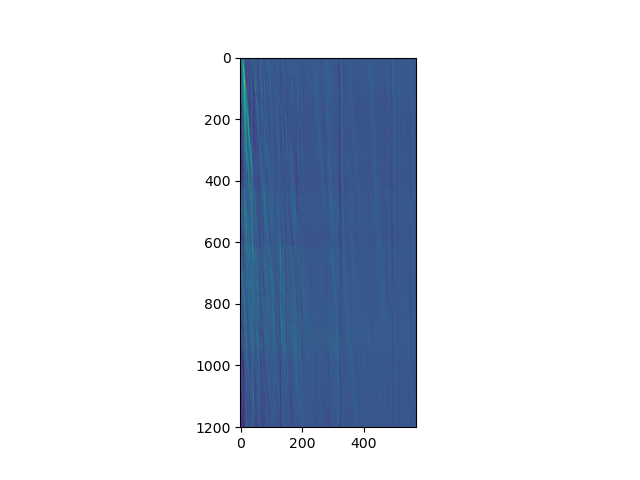

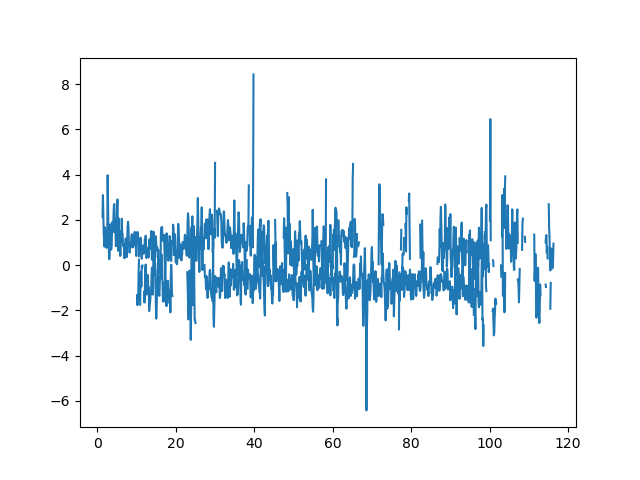

In [17]:
edge = 118, 142
path_kymo = os.path.join(path_general, path, f"{edge}kymo.npy")
kymo = np.load(path_kymo)
fig, ax = plt.subplots()
ax.imshow(kymo)
path_kymo = os.path.join(path_general, path, f"{edge}kymo_right.npy")
kymo = np.load(path_kymo)
fig, ax = plt.subplots()
ax.imshow(kymo)
path_kymo = os.path.join(path_general, path, f"{edge}kymo_left.npy")
kymo = np.load(path_kymo)
fig, ax = plt.subplots()
ax.imshow(kymo)
fig, ax = plt.subplots()

sub_select = select.loc[select["edge"] == str(edge)]
ax.plot(sub_select["time (s)"], sub_select["speed (um.s-1)"], label=edge)